In [14]:
import pickle
import sys
import numpy as np
import scipy
from sklearn.feature_selection import SelectKBest, SelectFpr
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv('recipe_train.csv')
num_steps = train_data.n_steps
num_ingr = train_data.n_ingredients
y_data = train_data.duration_label

/home/robert/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


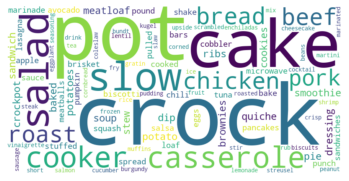

In [28]:
vocab = pickle.load(open("recipe_text_features_countvec/train_name_countvectorizer.pkl", "rb"))
vocab_dict = vocab.vocabulary_
inv_map = {v: k for k, v in vocab_dict.items()}

train_name = scipy.sparse.load_npz('recipe_text_features_countvec/train_name_vec.npz')

y_train, y_test, name_train, name_test = train_test_split(y_data, train_name)

clf = SelectFpr(chi2, alpha=0.001)
name_t_train = clf.fit_transform(name_train, y_train)
name_t_test = clf.transform(name_test)
inter = clf.get_support(indices=True)
clf = SelectKBest(mutual_info_classif, k=100)
name_t_train = clf.fit_transform(name_t_train, y_train)
name_t_test = clf.transform(name_t_test)

MI = mutual_info_classif(name_t_train, y_train)


support = clf.get_support(indices=True)

indecies = ''
while(len(MI)):
    next = np.argmax(MI)
    indecies += ' ' + inv_map[inter[support[next]]] + ' '
    MI = np.delete(MI, next, 0)
    support = np.delete(support, next, 0)



cloud = WordCloud(background_color='white', width=800, height=400, relative_scaling=0, normalize_plurals=False)
cloud.generate(indecies)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Cloud Name.png', bbox_inches='tight', dpi=150)
plt.show()

/home/robert/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


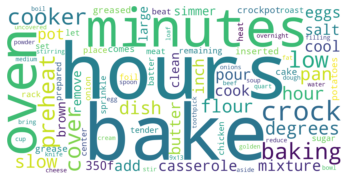

In [29]:
train_steps = scipy.sparse.load_npz('recipe_text_features_countvec/train_steps_vec.npz')

vocab = pickle.load(open("recipe_text_features_countvec/train_steps_countvectorizer.pkl", "rb"))
vocab_dict = vocab.vocabulary_
inv_map = {v: k for k, v in vocab_dict.items()}

y_train, y_test, steps_train, steps_test = train_test_split(y_data, train_steps)

clf = SelectFpr(chi2, alpha=0.001)
steps_t_train = clf.fit_transform(steps_train, y_train)
steps_t_test = clf.transform(steps_test)
inter = clf.get_support(indices=True)
clf = SelectKBest(mutual_info_classif, k=100)
steps_t_train = clf.fit_transform(steps_t_train, y_train)
steps_t_test = clf.transform(steps_t_test)

MI = mutual_info_classif(steps_t_train, y_train)


support = clf.get_support(indices=True)

indecies = ''
while(len(MI)):
    next = np.argmax(MI)
    indecies += ' ' + inv_map[inter[support[next]]] + ' '
    MI = np.delete(MI, next, 0)
    support = np.delete(support, next, 0)



cloud = WordCloud(background_color='white', width=1600, height=800, relative_scaling=0, normalize_plurals=False)
cloud.generate(indecies)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Cloud Steps.png', bbox_inches='tight', dpi=150)
plt.show()

/home/robert/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


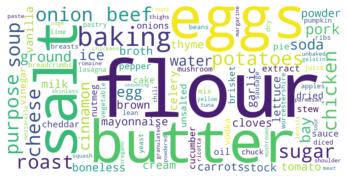

In [30]:
train_ingr = scipy.sparse.load_npz('recipe_text_features_countvec/train_ingr_vec.npz')

vocab = pickle.load(open("recipe_text_features_countvec/train_ingr_countvectorizer.pkl", "rb"))
vocab_dict = vocab.vocabulary_
inv_map = {v: k for k, v in vocab_dict.items()}

y_train, y_test, ingr_train, ingr_test = train_test_split(y_data, train_ingr)

clf = SelectFpr(chi2, alpha=0.001)
ingr_t_train = clf.fit_transform(ingr_train, y_train)
ingr_t_test = clf.transform(ingr_test)
inter = clf.get_support(indices=True)
clf = SelectKBest(mutual_info_classif, k=100)
ingr_t_train = clf.fit_transform(ingr_t_train, y_train)
ingr_t_test = clf.transform(ingr_t_test)

MI = mutual_info_classif(ingr_t_train, y_train)


support = clf.get_support(indices=True)

indecies = ''
while(len(MI)):
    next = np.argmax(MI)
    indecies += ' ' + inv_map[inter[support[next]]] + ' '
    MI = np.delete(MI, next, 0)
    support = np.delete(support, next, 0)



cloud = WordCloud(background_color='white', width=1600, height=800, relative_scaling=0, normalize_plurals=False)
cloud.generate(indecies)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Cloud Ingredients.png', bbox_inches='tight', dpi=150)
plt.show()